In [1]:
import numpy
import math
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = 10

In [7]:
# define baseline model
def base_model(hidden_layers, neurons):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    for h in range(hidden_layers):
        model.add(Dense(int(num_pixels/(math.pow(2,neurons+1))), kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

In [8]:
for layer in range(1, 3):
    for neuron in range(0, 4):
        # build the model
        model = base_model(layer, neuron)
        # Fit the model
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
        # Final evaluation of the model
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 19s - loss: 0.4685 - acc: 0.8659 - val_loss: 0.2633 - val_acc: 0.9209
Epoch 2/10
 - 17s - loss: 0.2326 - acc: 0.9314 - val_loss: 0.2086 - val_acc: 0.9382
Epoch 3/10
 - 16s - loss: 0.1945 - acc: 0.9427 - val_loss: 0.1798 - val_acc: 0.9453
Epoch 4/10
 - 16s - loss: 0.1702 - acc: 0.9503 - val_loss: 0.1632 - val_acc: 0.9510
Epoch 5/10
 - 16s - loss: 0.1525 - acc: 0.9555 - val_loss: 0.1506 - val_acc: 0.9542
Epoch 6/10
 - 16s - loss: 0.1391 - acc: 0.9588 - val_loss: 0.1394 - val_acc: 0.9567
Epoch 7/10
 - 16s - loss: 0.1277 - acc: 0.9624 - val_loss: 0.1306 - val_acc: 0.9598
Epoch 8/10
 - 16s - loss: 0.1186 - acc: 0.9658 - val_loss: 0.1240 - val_acc: 0.9610
Epoch 9/10
 - 16s - loss: 0.1106 - acc: 0.9679 - val_loss: 0.1180 - val_acc: 0.9629
Epoch 10/10
 - 16s - loss: 0.1037 - acc: 0.9702 - val_loss: 0.1147 - val_acc: 0.9641
Baseline Error: 3.59%
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.4827 - ac

In [9]:
# checking for neural network with 0 hidden layers
layer = 0
for neuron in range(0, 4):
    # build the model
    model = base_model(layer, neuron)
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.4804 - acc: 0.8758 - val_loss: 0.3046 - val_acc: 0.9139
Epoch 2/10
 - 10s - loss: 0.2901 - acc: 0.9172 - val_loss: 0.2683 - val_acc: 0.9231
Epoch 3/10
 - 10s - loss: 0.2600 - acc: 0.9260 - val_loss: 0.2470 - val_acc: 0.9300
Epoch 4/10
 - 11s - loss: 0.2403 - acc: 0.9318 - val_loss: 0.2313 - val_acc: 0.9342
Epoch 5/10
 - 10s - loss: 0.2250 - acc: 0.9356 - val_loss: 0.2198 - val_acc: 0.9361
Epoch 6/10
 - 10s - loss: 0.2122 - acc: 0.9395 - val_loss: 0.2094 - val_acc: 0.9396
Epoch 7/10
 - 10s - loss: 0.2013 - acc: 0.9428 - val_loss: 0.2006 - val_acc: 0.9421
Epoch 8/10
 - 10s - loss: 0.1917 - acc: 0.9452 - val_loss: 0.1924 - val_acc: 0.9446
Epoch 9/10
 - 10s - loss: 0.1834 - acc: 0.9479 - val_loss: 0.1843 - val_acc: 0.9471
Epoch 10/10
 - 11s - loss: 0.1758 - acc: 0.9497 - val_loss: 0.1780 - val_acc: 0.9489
Baseline Error: 5.11%
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.4392 - ac

In [10]:
# Best model with sigmoid activation function - 2 hidden layers, 392 neurons - 96.95%
# build the model
model = base_model(2, 0)
# Fit the model
output = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 21s - loss: 0.5369 - acc: 0.8333 - val_loss: 0.2474 - val_acc: 0.9238
Epoch 2/10
 - 22s - loss: 0.2192 - acc: 0.9345 - val_loss: 0.1938 - val_acc: 0.9426
Epoch 3/10
 - 20s - loss: 0.1731 - acc: 0.9478 - val_loss: 0.1629 - val_acc: 0.9503
Epoch 4/10
 - 21s - loss: 0.1467 - acc: 0.9560 - val_loss: 0.1430 - val_acc: 0.9569
Epoch 5/10
 - 22s - loss: 0.1285 - acc: 0.9624 - val_loss: 0.1346 - val_acc: 0.9614
Epoch 6/10
 - 21s - loss: 0.1146 - acc: 0.9667 - val_loss: 0.1213 - val_acc: 0.9642
Epoch 7/10
 - 23s - loss: 0.1040 - acc: 0.9699 - val_loss: 0.1111 - val_acc: 0.9663
Epoch 8/10
 - 19s - loss: 0.0947 - acc: 0.9721 - val_loss: 0.1057 - val_acc: 0.9677
Epoch 9/10
 - 27s - loss: 0.0876 - acc: 0.9746 - val_loss: 0.1039 - val_acc: 0.9677
Epoch 10/10
 - 24s - loss: 0.0810 - acc: 0.9761 - val_loss: 0.0975 - val_acc: 0.9695
Baseline Error: 3.05%


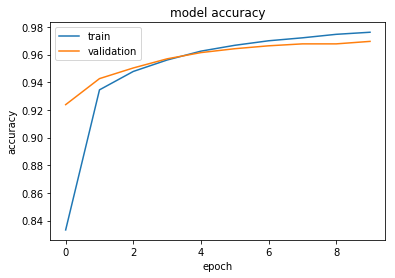

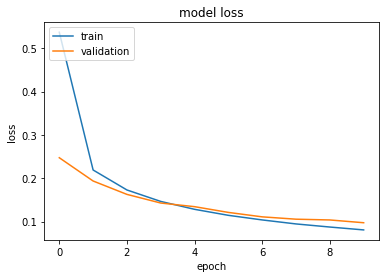

In [11]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()